In [1]:
import pysr
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pysr import PySRRegressor

Detected Jupyter notebook. Loading juliacall extension. Set `PYSR_AUTOLOAD_EXTENSIONS=no` to disable.


In [2]:
path = 'C:/Users/ss230/Documents/Python/Stars/star.csv'

In [3]:
df = pd.read_csv(path)

In [4]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Blue,O,5
236,30839,834042.000000,1194.0000,-10.63,Blue,O,5
237,8829,537493.000000,1423.0000,-10.73,White,A,5
238,9235,404940.000000,1112.0000,-11.23,White,A,5


In [5]:
column_names = df.columns[:-1]

In [6]:
df['Color'].unique()

array(['Red', 'Blue White', 'White', 'Yellowish White', 'Blue white',
       'Pale yellow orange', 'Blue', 'Blue-white', 'Whitish',
       'yellow-white', 'Orange', 'White-Yellow', 'white', 'yellowish',
       'Yellowish', 'Orange-Red', 'Blue-White'], dtype=object)

In [7]:
df['Color'] = df['Color'].str.replace('yellowish', 'Yellowish')
df['Color'] = df['Color'].str.replace('yellow-white', 'White-Yellow')
df['Color'] = df['Color'].str.replace('Yellowish White', 'White-Yellow')
df['Color'] = df['Color'].str.replace('Blue white', 'Blue-White')
df['Color'] = df['Color'].str.replace('Blue White', 'Blue-White')
df['Color'] = df['Color'].str.replace('white', 'White')
df['Color'] = df['Color'].str.replace('Whitish', 'White')

In [8]:
df['Color'].unique()

array(['Red', 'Blue-White', 'White', 'White-Yellow', 'Pale yellow orange',
       'Blue', 'Orange', 'Yellowish', 'Orange-Red'], dtype=object)

In [9]:
df['Color_Num'] = pd.factorize(df['Color'])[0] + 1

df['Color_Num'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [10]:
df['Spec_Class_Num'] = pd.factorize(df['Spectral_Class'])[0] + 1

In [11]:
df['Temperature'] = df['Temperature'] /5800

In [12]:
df

,Temperature,L,R,A_M,Color,Spectral_Class,Type,Color_Num,Spec_Class_Num
0,0.528966,0.002400,0.1700,16.12,Red,M,0,1,1
1,0.524483,0.000500,0.1542,16.60,Red,M,0,1,1
2,0.448276,0.000300,0.1020,18.70,Red,M,0,1,1
3,0.482759,0.000200,0.1600,16.65,Red,M,0,1,1
4,0.334310,0.000138,0.1030,20.06,Red,M,0,1,1
...,...,...,...,...,...,...,...,...,...
235,6.713793,374830.000000,1356.0000,-9.93,Blue,O,5,6,5
236,5.317069,834042.000000,1194.0000,-10.63,Blue,O,5,6,5
237,1.522241,537493.000000,1423.0000,-10.73,White,A,5,3,3
238,1.592241,404940.000000,1112.0000,-11.23,White,A,5,3,3


In [13]:
mapping_spectral_class = dict(zip(df['Spectral_Class'], df['Spec_Class_Num']))
mapping_color = dict(zip(df['Color'], df['Color_Num']))

In [14]:
print(mapping_color)
print(mapping_spectral_class)

{'Red': 1, 'Blue-White': 2, 'White': 3, 'White-Yellow': 4, 'Pale yellow orange': 5, 'Blue': 6, 'Orange': 7, 'Yellowish': 8, 'Orange-Red': 9}
{'M': 1, 'B': 2, 'A': 3, 'F': 4, 'O': 5, 'K': 6, 'G': 7}


In [15]:
df.drop(['Spectral_Class', 'Color'], axis=1)

,Temperature,L,R,A_M,Type,Color_Num,Spec_Class_Num
0,0.528966,0.002400,0.1700,16.12,0,1,1
1,0.524483,0.000500,0.1542,16.60,0,1,1
2,0.448276,0.000300,0.1020,18.70,0,1,1
3,0.482759,0.000200,0.1600,16.65,0,1,1
4,0.334310,0.000138,0.1030,20.06,0,1,1
...,...,...,...,...,...,...,...
235,6.713793,374830.000000,1356.0000,-9.93,5,6,5
236,5.317069,834042.000000,1194.0000,-10.63,5,6,5
237,1.522241,537493.000000,1423.0000,-10.73,5,3,3
238,1.592241,404940.000000,1112.0000,-11.23,5,3,3


In [47]:
X = df[['Temperature', 'R', 'L']]
y = df['A_M']

In [48]:
m1 = PySRRegressor(
    niterations=2500,  
    binary_operators=["+", "*", "-", "/", "^"],
    unary_operators=[
        "cos","sin","tan",
        "exp",
        "log",
        "log10",
        "sqrt"
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    constraints={"^": (-1,1)},
)

In [49]:
m1.fit(X,y)

C:\Users\ss230\AppData\Local\Programs\Python\Python310\lib\site-packages\pysr\sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.300e+05
Head worker occupation: 13.9%
Progress: 274 / 37500 total iterations (0.731%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.343e+02  1.594e+01  y = Temperature
2           1.105e+02  1.954e-01  y = exp(1.4776)
3           9.865e+01  1.131e-01  y = 6.2172 - Temperature
4           6.450e+00  2.727e+00  y = 6.0106 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.753e+00  3.666e-02  y = (6.0023 - log(L)) - sin(log(R))
9           4.507e+00  5.311e-02  y = log(201.78 / L) + (cos(L) / Temperature)
10          4.010e+00  1.168e-01  y = (6.0023 - log(L)) - (sin(log(R)) / Temperature)
11          3.531e+00  1.273e-01  y = ((exp(0.84057 - R) / Temperature) - log(L)) + 4.8166
12          3.425e+00  3.039e-02  y = ((exp(cos(Temperature) - R) / Temperature) - log(L)) + 4.7...
                


Expressions evaluated per second: 1.240e+05
Head worker occupation: 18.1%
Progress: 2154 / 37500 total iterations (5.744%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.112e+02  1.594e+01  y = 5.2467
2           1.105e+02  6.739e-03  y = exp(1.4776)
3           8.312e+01  2.845e-01  y = 0.0030509 / L
4           6.450e+00  2.556e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = (6.661 + (-0.0027428 * R)) - log(L)
9           3.686e+00  1.876e-01  y = (6.1675 - log(L)) - (log10(R) / Temperature)
10          3.350e+00  9.563e-02  y = (5.1238 - log(L)) / cos(exp(-0.78941 * Temperature))
11          3.272e+00  2.365e-02  y = (6.0016 - log(L)) - (log10(R * Temperature) / Temperature)
12          3.129e+00  4.444e-02  y = (5.1515 - log(L)) - ((log10(R) - sin(1.5899)) / Temperatur...
        


Expressions evaluated per second: 1.250e+05
Head worker occupation: 17.2%
Progress: 3468 / 37500 total iterations (9.248%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.112e+02  1.594e+01  y = 5.2467
2           1.105e+02  6.739e-03  y = exp(1.4776)
3           8.312e+01  2.845e-01  y = 0.0030509 / L
4           6.450e+00  2.556e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.643e+00  1.993e-01  y = (5.5171 - log(L)) / cos(0.47911 ^ Temperature)
10          3.350e+00  8.398e-02  y = (5.1238 - log(L)) / cos(exp(-0.78941 * Temperature))
11          3.122e+00  7.047e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
         

Head worker occupation: 17.2%
Progress: 5566 / 37500 total iterations (14.843%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.112e+02  1.594e+01  y = 5.2467
2           1.105e+02  6.739e-03  y = exp(1.4776)
3           8.312e+01  2.845e-01  y = 0.0030509 / L
4           6.450e+00  2.556e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1238 - log(L)) / cos(0.45566 ^ Temperature)
10          3.350e+00  2.408e-05  y = (5.1238 - log(L)) / cos(exp(-0.78941 * Temperature))
11          3.122e+00  7.047e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
                                  rature)
13         

Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.112e+02  1.594e+01  y = 5.2467
2           1.105e+02  6.739e-03  y = exp(1.4776)
3           8.312e+01  2.845e-01  y = 0.0030509 / L
4           6.450e+00  2.556e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1238 - log(L)) / cos(0.45566 ^ Temperature)
10          3.350e+00  2.408e-05  y = (5.1238 - log(L)) / cos(exp(-0.78941 * Temperature))
11          3.122e+00  7.047e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
                                  rature)
13          2.590e+00  1.471e-01  y = (5.6607 - log(L)) - (tan(sin(log(R / 0.51145))) / Tem

Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.112e+02  1.594e+01  y = 5.2467
2           1.105e+02  6.739e-03  y = exp(1.4776)
3           8.312e+01  2.845e-01  y = 0.0030509 / L
4           6.450e+00  2.556e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1238 - log(L)) / cos(0.45566 ^ Temperature)
10          3.341e+00  2.792e-03  y = (5.1238 - log(L)) / cos(tan(0.36998 ^ Temperature))
11          3.122e+00  6.770e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
                                  rature)
13          2.590e+00  1.471e-01  y = (5.6607 - log(L)) - (tan(sin(log(R / 0.51145))) / Temp

Expressions evaluated per second: 1.270e+05
Head worker occupation: 19.2%
Progress: 9877 / 37500 total iterations (26.339%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.112e+02  1.594e+01  y = 5.2467
2           1.105e+02  6.739e-03  y = exp(1.4776)
3           8.312e+01  2.845e-01  y = 0.0030509 / L
4           6.450e+00  2.556e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1238 - log(L)) / cos(0.45566 ^ Temperature)
10          3.341e+00  2.792e-03  y = (5.1238 - log(L)) / cos(tan(0.36998 ^ Temperature))
11          3.122e+00  6.770e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
          

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.250e+05
Head worker occupation: 18.5%
Progress: 11990 / 37500 total iterations (31.973%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.110e+02  1.594e+01  y = 5.1239
2           1.105e+02  4.964e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34418
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.323e+00  8.002e-03  y = ((4.9951 - log(L)) * 1.1425) / (Temperature ^ 0.16808)
11          3.122e+00  6.246e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)

Expressions evaluated per second: 1.350e+05
Head worker occupation: 18.8%
Progress: 14254 / 37500 total iterations (38.011%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.110e+02  1.594e+01  y = 5.1239
2           1.105e+02  4.964e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34418
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.323e+00  8.026e-03  y = ((4.9951 - log(L)) * 1.1425) / (Temperature ^ 0.16861)
11          3.122e+00  6.244e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
       

Head worker occupation: 16.4%
Progress: 15339 / 37500 total iterations (40.904%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.110e+02  1.594e+01  y = 5.1239
2           1.105e+02  4.964e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34418
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.323e+00  8.026e-03  y = ((4.9951 - log(L)) * 1.1425) / (Temperature ^ 0.16861)
11          3.122e+00  6.244e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
                                  rature)
13       

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.250e+05
Head worker occupation: 19.6%
Progress: 16923 / 37500 total iterations (45.128%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.107e+02  1.594e+01  y = 3.9348
2           1.105e+02  1.812e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20445 / Temperature) - -0.88794)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(


Expressions evaluated per second: 1.310e+05
Head worker occupation: 20.2%
Progress: 18035 / 37500 total iterations (48.093%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.107e+02  1.594e+01  y = 3.9348
2           1.105e+02  1.812e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20445 / Temperature) - -0.88794)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
    

Expressions evaluated per second: 1.230e+05
Head worker occupation: 19.4%
Progress: 20097 / 37500 total iterations (53.592%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.107e+02  1.594e+01  y = 3.9348
2           1.105e+02  1.812e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
     

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.250e+05
Head worker occupation: 17.6%
Progress: 21662 / 37500 total iterations (57.765%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.107e+02  1.594e+01  y = 3.9348
2           1.105e+02  1.812e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(


Expressions evaluated per second: 1.150e+05
Head worker occupation: 19.1%
Progress: 23169 / 37500 total iterations (61.784%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.107e+02  1.594e+01  y = 3.9348
2           1.105e+02  1.812e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
    


Expressions evaluated per second: 1.330e+05
Head worker occupation: 17.7%
Progress: 25119 / 37500 total iterations (66.984%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.164
2           1.105e+02  4.318e-04  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
     


Expressions evaluated per second: 1.280e+05
Head worker occupation: 19.1%
Progress: 26464 / 37500 total iterations (70.571%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.164
2           1.105e+02  4.318e-04  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
     


Expressions evaluated per second: 1.300e+05
Head worker occupation: 17.0%
Progress: 28641 / 37500 total iterations (76.376%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.164
2           1.105e+02  4.318e-04  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
     

Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.164
2           1.105e+02  4.318e-04  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
                                  rature)
13          2.445e+00  2.047e-01  y = ((5.1285 - log(L)) / cos(0.43866 ^ Temperature)) - 

Progress: 32170 / 37500 total iterations (85.787%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.164
2           1.105e+02  4.318e-04  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
                                  rature)
13          2.445e+00  2.047e-01  y = 


Expressions evaluated per second: 1.300e+05
Head worker occupation: 17.9%
Progress: 33272 / 37500 total iterations (88.725%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.164
2           1.105e+02  4.318e-04  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
     


Expressions evaluated per second: 1.280e+05
Head worker occupation: 20.5%
Progress: 35181 / 37500 total iterations (93.816%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.164
2           1.105e+02  4.318e-04  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
     


Expressions evaluated per second: 1.230e+05
Head worker occupation: 22.1%
Progress: 36728 / 37500 total iterations (97.941%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.164
2           1.105e+02  4.318e-04  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34422
4           6.450e+00  1.770e+00  y = 6.0105 - log(L)
6           5.114e+00  1.161e-01  y = 6.2172 - (log(L) / 0.88743)
8           4.447e+00  6.992e-02  y = 6.661 - (log(L) + (R * 0.0027427))
9           3.350e+00  2.832e-01  y = (5.1239 - log(L)) / cos(0.45409 ^ Temperature)
10          3.255e+00  2.887e-02  y = (5.0599 - log(L)) * ((0.20446 / Temperature) - -0.88793)
11          3.122e+00  4.160e-02  y = (5.0124 - log(L)) - ((log10(R) + -1.0582) / Temperature)
12          3.000e+00  3.976e-02  y = (5.4731 - log(L)) - ((log10(R) - cos(Temperature)) / Tempe...
     

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          4.1639957   
	1         0.000432                                     exp(1.4775952)   
	2         1.070202                                    L ^ -0.34421524   
	3         1.770427                                  6.010468 - log(L)   
	4         0.116057                   6.2172074 - (log(L) / 0.8874321)   
	5         0.069923          6.6610117 - (log(L) + (R * 0.0027427354))   
	6         0.283228  (5.123859 - log(L)) / cos(0.45409125 ^ Tempera...   
	7         0.028868  (5.059936 - log(L)) * ((0.20445801 / Temperatu...   
	8         0.041598  (5.0123816 - log(L)) - ((log10(R) + -1.0582359...   
	9         0.074044  ((0.86081964 ^ Temperature) * (13.061422 - log...   
	10  >>>>  0.170373  ((5.1284556 - log(L)) / cos(0.43866193 ^ Tempe...   
	11        0.158047  -3.8212261 + (((0.072352506 ^ Temperature) - -...   
	12        0.014792  ((11.118151 - log(R * sqrt(L))) * ((0.1741044 ...   
	13        0.000137  ((11.000671 - log(R * sqrt(L))) * ((tan(0.1746...   
	14        0.005314  (((0.062021196 ^ Temperature) - -0.67422897) *...   
	15        0.007505  (((0.062021196 ^ Temperature) - -0.67422897) *...   
	16        0.081928  ((10.109025 - log(R * sqrt(L))) * (((0.2670781...   
	17        0.002981  ((9.987704 - log(sqrt(L) * R)) * (((0.12849778...   
	
	          loss  complexity  
	0   110.519290           1  
	1   110.471565           2  
	2    37.885033           3  
	3     6.450313           4  
	4     5.114171           6  
	5     4.446735           8  
	6     3.349938           9  
	7     3.254615          10  
	8     3.122007          11  
	9     2.899193          12  
	10    2.445034          13  
	11    2.087593          14  
	12    2.056941          15  
	13    2.056660          16  
	14    2.045759          17  
	15    2.030464          18  
	16    1.870745          19  
	17    1.865177          20  
]

In [62]:
#((5.1284556 - log(L)) / cos(0.43866193 ^ Temperature)) - cos(log(R))

In [58]:
results = m1.predict(X,10)

In [59]:
Prediction = pd.DataFrame({'Actual': y, 'Predicted': results})

In [60]:
Prediction

,Actual,Predicted
0,16.12,14.184298
1,16.60,16.273182
2,18.70,17.836995
3,16.65,17.692716
4,20.06,19.969139
...,...,...
235,-9.93,-8.304380
236,-10.63,-9.201606
237,-10.73,-8.965134
238,-11.23,-8.818664


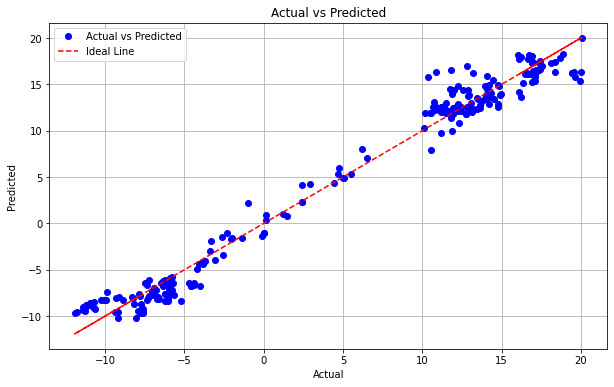

In [61]:
plt.figure(figsize=(10, 6)) 
plt.plot(Prediction['Actual'], Prediction['Predicted'], marker='o', linestyle='', color='blue', label='Actual vs Predicted')
plt.plot(Prediction['Actual'], Prediction['Actual'], linestyle='--', color='red', label='Ideal Line')
plt.xlabel('Actual') 
plt.ylabel('Predicted')  
plt.title('Actual vs Predicted')  
plt.legend()  
plt.grid(True) 
plt.show()  

In [63]:
m2 = PySRRegressor(
    niterations=2500,  
    binary_operators=["+", "*", "-", "^"],
    unary_operators=[
        "exp",
        "log",
        "log10",
        "sqrt"
    ],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
    constraints={"^": (-1,1)},
)

In [64]:
m2.fit(X,y)

C:\Users\ss230\AppData\Local\Programs\Python\Python310\lib\site-packages\pysr\sr.py:1302: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 1.310e+05
Head worker occupation: 17.3%
Progress: 278 / 37500 total iterations (0.741%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.355e+10  1.594e+01  y = L
2           1.105e+02  1.592e+01  y = exp(1.4776)
3           9.866e+01  1.131e-01  y = 6.2479 - Temperature
4           6.450e+00  2.728e+00  y = 6.0106 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.611e+00  5.181e-02  y = (7.0497 - log(L)) - (0.0026795 * R)
10          4.239e+00  4.204e-02  y = (1.0598 * (6.2479 - log(L))) - (0.0021655 * R)
12          4.238e+00  6.137e-05  y = (1.0598 * (6.2479 - log(L))) - (0.0021655 * (R + Temperatu...
                                  re))
13          4.237e+00  2.283e-04  y = (1.0598 * (6.2479 - log(L))) - (0.0021655 * (R + log(Tempe...
                                  rature)))
14         


Expressions evaluated per second: 1.280e+05
Head worker occupation: 18.3%
Progress: 2655 / 37500 total iterations (7.080%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.202e+02  1.594e+01  y = 1.264
2           1.105e+02  8.437e-02  y = exp(1.4776)
3           7.690e+01  3.622e-01  y = R ^ -0.58944
4           6.450e+00  2.478e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6819 - log(L)) - (R ^ 0.21399)
9           4.096e+00  6.893e-02  y = (6.8498 - log(L)) - log10(R + Temperature)
10          3.638e+00  1.184e-01  y = ((R + Temperature) ^ -2.5121) + (4.8749 - log(L))
11          3.324e+00  9.028e-02  y = (5.0071 - log(L)) * ((0.66127 * sqrt(Temperature)) ^ -0.32...
                                  729)
12          3.236e+00  2.680e-02  y = (((Temperature * 0.52805) + R) ^ -1.59


Expressions evaluated per second: 1.240e+05
Head worker occupation: 17.9%
Progress: 3962 / 37500 total iterations (10.565%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.159e+02  1.594e+01  y = 2.0526
2           1.105e+02  4.797e-02  y = exp(1.4776)
3           6.276e+01  5.654e-01  y = L ^ -0.24831
4           6.450e+00  2.275e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6819 - log(L)) - (R ^ 0.21399)
9           4.096e+00  6.893e-02  y = (6.8498 - log(L)) - log10(R + Temperature)
10          3.393e+00  1.882e-01  y = (5.0071 - log(L)) * sqrt(exp(0.24347 ^ Temperature))
11          3.322e+00  2.098e-02  y = (5.0217 - log(L)) * ((0.67277 * sqrt(Temperature)) ^ -0.33...
                                  616)
12          3.236e+00  2.623e-02  y = (((Temperature * 0.52805) + R) ^ 

Expressions evaluated per second: 1.280e+05
Head worker occupation: 16.7%
Progress: 5304 / 37500 total iterations (14.144%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.109e+02  1.594e+01  y = 5.0217
2           1.105e+02  3.693e-03  y = exp(1.4776)
3           6.276e+01  5.654e-01  y = L ^ -0.24831
4           6.450e+00  2.275e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6819 - log(L)) - (R ^ 0.21399)
9           4.095e+00  6.896e-02  y = (6.8503 - log(L)) - log10(R + Temperature)
10          3.393e+00  1.882e-01  y = (5.0071 - log(L)) * sqrt(exp(0.24347 ^ Temperature))
11          3.322e+00  2.098e-02  y = (5.0217 - log(L)) * ((0.67277 * sqrt(Temperature)) ^ -0.33...
                                  616)
12          3.236e+00  2.623e-02  y = (((Temperature * 0.52805) + R) ^ -


Expressions evaluated per second: 1.290e+05
Head worker occupation: 17.1%
Progress: 6400 / 37500 total iterations (17.067%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.109e+02  1.594e+01  y = 5.0217
2           1.105e+02  3.693e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.3442
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6819 - log(L)) - (R ^ 0.21399)
9           4.095e+00  6.896e-02  y = (6.8503 - log(L)) - log10(R + Temperature)
10          3.376e+00  1.933e-01  y = (5.1385 - log(L)) * sqrt(exp(0.23066 ^ Temperature))
11          3.322e+00  1.591e-02  y = (5.0217 - log(L)) * ((0.67277 * sqrt(Temperature)) ^ -0.33...
                                  616)
12          3.143e+00  5.563e-02  y = exp(exp(0.86638 ^ Temperature) - R


Expressions evaluated per second: 1.300e+05
Head worker occupation: 18.8%
Progress: 8339 / 37500 total iterations (22.237%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.109e+02  1.594e+01  y = 5.0217
2           1.105e+02  3.693e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.3442
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6819 - log(L)) - (R ^ 0.21399)
9           3.365e+00  2.656e-01  y = (5.1385 - log(L)) * exp(0.055893 ^ Temperature)
11          3.302e+00  9.449e-03  y = (exp(0.077588 ^ Temperature) * (3.1798 - log(L))) - -2.139
12          3.046e+00  8.060e-02  y = exp(exp(0.88551 ^ Temperature) - R) - log10(L * R)
13          2.722e+00  1.124e-01  y = exp((0.44089 ^ Temperature) - (-1.9648 + R)) - log10(L * R...
           


Expressions evaluated per second: 1.360e+05
Head worker occupation: 17.6%
Progress: 10607 / 37500 total iterations (28.285%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.109e+02  1.594e+01  y = 5.0217
2           1.105e+02  3.693e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068294 ^ Temperature)
11          3.282e+00  6.206e-03  y = ((5.0948 - log(L)) * exp(0.090869 ^ Temperature)) * 0.9638...
                                  5
12          3.036e+00  7.772e-02  y = (2.6346 - log10(sqrt(R) * L)) * exp(0.82585 ^ Temperature)
13          2.722e+00  1.093e-01  y = exp((0.44089 ^ Temperatur


Expressions evaluated per second: 1.310e+05
Head worker occupation: 17.2%
Progress: 11979 / 37500 total iterations (31.944%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.109e+02  1.594e+01  y = 5.0217
2           1.105e+02  3.693e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068294 ^ Temperature)
11          2.992e+00  5.252e-02  y = (Temperature ^ -0.15208) * ((5.5171 - log(L)) - log10(R))
12          2.848e+00  4.922e-02  y = (sqrt(Temperature) ^ -0.37226) * ((5.5171 - log(L)) - log1...
                                  0(R))
13          2.701e+00  5.309e-02  y = (((6.9222 - log(L)) - 

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.330e+05
Head worker occupation: 20.3%
Progress: 13907 / 37500 total iterations (37.085%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.109e+02  1.594e+01  y = 5.0217
2           1.105e+02  3.693e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068294 ^ Temperature)
10          3.322e+00  1.505e-04  y = ((Temperature ^ -0.16807) * (5.0217 - log(L))) * 1.1425
11          2.738e+00  1.934e-01  y = ((6.0104 - log(L)) * (Temperature ^ -0.19304)) - log10(R)
13          2.672e+00  1.231e-02  y = (((Temperature ^


Expressions evaluated per second: 1.300e+05
Head worker occupation: 18.6%
Progress: 15293 / 37500 total iterations (40.781%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.109e+02  1.594e+01  y = 5.0217
2           1.105e+02  3.693e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068294 ^ Temperature)
10          3.322e+00  1.505e-04  y = ((Temperature ^ -0.16807) * (5.0217 - log(L))) * 1.1425
11          2.724e+00  1.984e-01  y = ((6.0104 - log(L)) * (Temperature ^ -0.21266)) - log10(R)
13          2.551e+00  3.283e-02  y = ((6.0104 - log(L)) * ((Temperature ^ -0.21266) + -0.043192...
      


Expressions evaluated per second: 1.330e+05
Head worker occupation: 21.0%
Progress: 17578 / 37500 total iterations (46.875%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.109e+02  1.594e+01  y = 5.0217
2           1.105e+02  3.693e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.721e+00  1.997e-01  y = ((5.984 - log(L)) * (Temperature ^ -0.2216)) - log10(R)
12          2.678e+00  1.590e-02  y = ((5.7755 - log(L)) * sqrt(Temperature ^ -0.44208)) - log10...
        


Expressions evaluated per second: 1.300e+05
Head worker occupation: 18.0%
Progress: 18964 / 37500 total iterations (50.571%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.106e+02  1.594e+01  y = 4.7982
2           1.105e+02  1.564e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.379e+00  5.930e-02  y = ((7.7341 - log(L)) * ((Temperature ^ -0.2543) + -0.28886))...
      


Expressions evaluated per second: 1.340e+05
Head worker occupation: 17.2%
Progress: 20639 / 37500 total iterations (55.037%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.106e+02  1.594e+01  y = 4.7982
2           1.105e+02  1.564e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.376e+00  5.985e-02  y = ((7.7341 - log(L)) * ((Temperature ^ -0.28886) + -0.28886)...
      

Progress: 22575 / 37500 total iterations (60.200%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.106e+02  1.594e+01  y = 4.7982
2           1.105e+02  1.564e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.304e+00  7.527e-02  y = ((8.1012 - log(L)) * ((Temperature ^ -0.25858) + -0.2927))...
                                   - log(R)
15          2.164e+00  3.139e-02  y =

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.300e+05
Head worker occupation: 18.8%
Progress: 24808 / 37500 total iterations (66.155%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.106e+02  1.594e+01  y = 4.7982
2           1.105e+02  1.564e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.682 - log(L)) - (R ^ 0.21411)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.303e+00  7.542e-02  y = (((Temperature ^

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.280e+05
Head worker occupation: 18.5%
Progress: 26435 / 37500 total iterations (70.493%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.106e+02  1.594e+01  y = 4.7982
2           1.105e+02  1.564e-03  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6824 - log(L)) - (R ^ 0.2141)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.303e+00  7.542e-02  y = (((Temperature ^

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.280e+05
Head worker occupation: 18.6%
Progress: 28094 / 37500 total iterations (74.917%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.3551
2           1.105e+02  6.914e-06  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6824 - log(L)) - (R ^ 0.2141)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.303e+00  7.542e-02  y = (((Temperature ^

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.360e+05
Head worker occupation: 18.6%
Progress: 29782 / 37500 total iterations (79.419%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.3551
2           1.105e+02  6.914e-06  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6824 - log(L)) - (R ^ 0.2141)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.303e+00  7.542e-02  y = (((Temperature ^

Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.270e+05
Head worker occupation: 16.4%
Progress: 31692 / 37500 total iterations (84.512%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.3551
2           1.105e+02  6.914e-06  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6824 - log(L)) - (R ^ 0.2141)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.303e+00  7.542e-02  y = (((Temperature ^


Expressions evaluated per second: 1.330e+05
Head worker occupation: 16.2%
Progress: 32829 / 37500 total iterations (87.544%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.3551
2           1.105e+02  6.914e-06  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6824 - log(L)) - (R ^ 0.2141)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.303e+00  7.542e-02  y = (((Temperature ^ -0.25915) + -0.29378) * (8.1446 - log(L))...
      


Expressions evaluated per second: 1.280e+05
Head worker occupation: 14.8%
Progress: 35003 / 37500 total iterations (93.341%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.3551
2           1.105e+02  6.914e-06  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6824 - log(L)) - (R ^ 0.2141)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.303e+00  7.542e-02  y = (((Temperature ^ -0.25915) + -0.29378) * (8.1446 - log(L))...
      


Expressions evaluated per second: 1.280e+05
Head worker occupation: 15.7%
Progress: 36081 / 37500 total iterations (96.216%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           1.105e+02  1.594e+01  y = 4.3551
2           1.105e+02  6.914e-06  y = exp(1.4776)
3           3.789e+01  1.070e+00  y = L ^ -0.34421
4           6.450e+00  1.770e+00  y = 6.0104 - log(L)
6           5.114e+00  1.161e-01  y = 1.1269 * (5.5171 - log(L))
8           4.388e+00  7.659e-02  y = (7.6824 - log(L)) - (R ^ 0.2141)
9           3.323e+00  2.780e-01  y = (5.1023 - log(L)) * exp(0.068295 ^ Temperature)
10          3.322e+00  1.505e-04  y = 1.1425 * ((5.0217 - log(L)) * (Temperature ^ -0.16809))
11          2.678e+00  2.156e-01  y = ((5.7755 - log(L)) * (Temperature ^ -0.22104)) - log10(R)
13          2.303e+00  7.542e-02  y = (((Temperature ^ -0.25915) + -0.29378) * (8.1446 - log(L))...
      

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                          4.3550787   
	1         0.000007                                     exp(1.4775953)   
	2         1.070202                                    L ^ -0.34421206   
	3         1.770427                                   6.01045 - log(L)   
	4         0.116057                   1.1269065 * (5.5170603 - log(L))   
	5         0.076592            (7.6823535 - log(L)) - (R ^ 0.21409734)   
	6         0.278010  (5.102278 - log(L)) * exp(0.068294965 ^ Temper...   
	7         0.000151  1.1425331 * ((5.0217175 - log(L)) * (Temperatu...   
	8   >>>>  0.215559  ((5.775537 - log(L)) * (Temperature ^ -0.22103...   
	9         0.082808  ((8.158051 - log(L)) * ((Temperature ^ -0.3934...   
	10        0.002768  ((sqrt(Temperature ^ -0.75901073) * 0.695913) ...   
	11        0.046390  ((-0.3039674 + (Temperature ^ -0.23453385)) * ...   
	12        0.023099  (((5.309395 - log(sqrt(L))) * ((Temperature ^ ...   
	13        0.070019  (1.8894771 + exp((0.41898638 ^ Temperature) - ...   
	14        0.019575  exp(exp(0.36632806 ^ Temperature) - (sqrt(R) +...   
	
	          loss  complexity  
	0   110.472340           1  
	1   110.471565           2  
	2    37.885033           3  
	3     6.450313           4  
	4     5.114172           6  
	5     4.387817           8  
	6     3.322846           9  
	7     3.322345          10  
	8     2.678113          11  
	9     2.269355          13  
	10    2.263083          14  
	11    2.160496          15  
	12    2.111163          16  
	13    1.968398          17  
	14    1.892823          19  
]

In [68]:
r1 = m2.predict(X,8)
P1 = pd.DataFrame({'Actual': y, 'Predicted': r1})
P1

,Actual,Predicted
0,16.12,14.362180
1,16.60,16.239258
2,18.70,17.573484
3,16.65,17.584828
4,20.06,19.669373
...,...,...
235,-9.93,-7.765995
236,-10.63,-8.508722
237,-10.73,-9.914300
238,-11.23,-9.484835


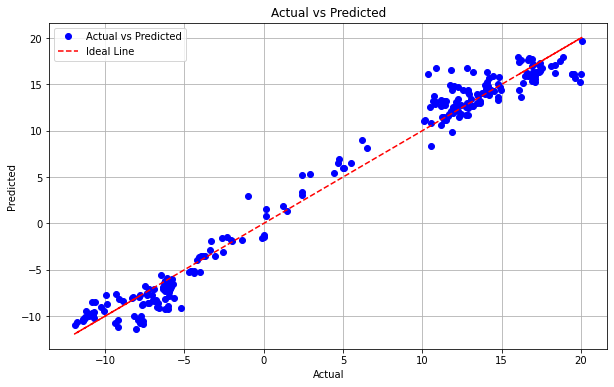

In [69]:
plt.figure(figsize=(10, 6)) 
plt.plot(P1['Actual'], P1['Predicted'], marker='o', linestyle='', color='blue', label='Actual vs Predicted')
plt.plot(P1['Actual'], P1['Actual'], linestyle='--', color='red', label='Ideal Line')
plt.xlabel('Actual') 
plt.ylabel('Predicted')  
plt.title('Actual vs Predicted')  
plt.legend()  
plt.grid(True) 
plt.show()  